<h1>PRÁCTICA PROFESIONALIZANTE 1</h1>

<hr style="border: 0; border-top: 2px solid black;">

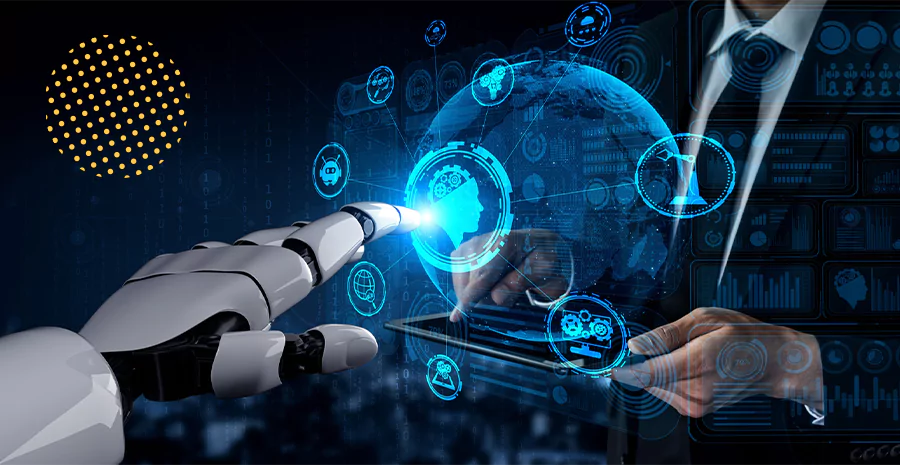

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection as model_sel
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

## OBTENER DATOS

In [3]:
df_diabetes=pd.read_csv("diabetes.csv",encoding="ISO-8859-1",delimiter=",")
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## INFORMACIÓN DEL DF

**CAMPOS DEL DATASET - BREVE DESCRIPCIÓN**
* Pregnancies: Número de veces que está embarazada
* Glucose: Concentración de glucosa plasmática a las 2 horas en una prueba de tolerancia oral a la glucosa.
* BloodPressure: presión arterial diastólica (mm Hg)
* SkinThickness: Grosor del pliegue cutáneo del tríceps (mm)
* Insulin: insulina sérica de 2 horas (mu U/ml)
* BMI:  índice de masa corporal (peso en kg/(altura en m)^2)
* DiabetesPedigreeFunction: Función de pedigrí de diabetes
* Age: Edad
* Outcome: VARIABLE DE CLASE (0 o 1)

## EXPLORACIÓN DEL DATASET

<span style="color:blue">
Observaciones de la exploración:    <br>   
* El Dataframe "Diabetes" cuenta con 768 filas y 9 columnas.   <br>     
* La columna que se utilizará como etiqueta es "Outcome" la cual indica si el paciente cuenta o no con diabetes. <br>   
* La variable objetivo "Outcome" está desbalanceada.    <br>
* No hay campos que tengan valores nulos.    <br>
* No se observan filas duplicadas.    <br>
* Se aprecia que hay 35 filas con "BloodPressure" en 0, lo cual podría indicar un error en medición o de registro. Lo mismo sucede con "Glucose" y "BMI", detectamos 5 y 11 filas con valor 0 respectivamente.
    </span>

In [4]:
print(df_diabetes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
#¿Hay campos con valores nulos?

print(df_diabetes.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [6]:
print(df_diabetes.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [7]:
# Detectar filas duplicadas
print(f'Número de filas duplicadas: ',df_diabetes.duplicated().sum())

Número de filas duplicadas:  0


### GRÁFICOS

**Gráfico de la variable a predecir "Outcome"**

Outcome
0    500
1    268
dtype: int64


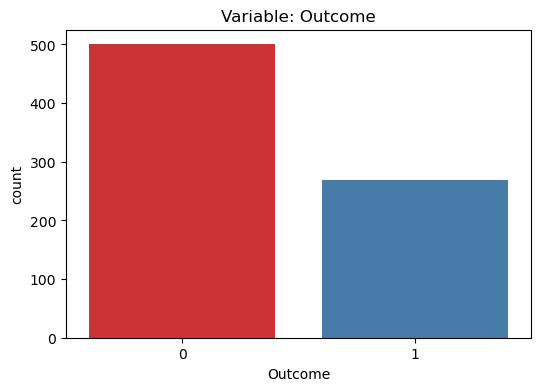

In [8]:
print(df_diabetes.groupby("Outcome").size())

# Count plot
plt.figure(figsize=(6, 4))  # Ancho: 8 pulgadas, Alto: 6 pulgadas
plt.title("Variable: Outcome",fontsize=12)

sns.countplot(x = df_diabetes["Outcome"],palette = "Set1")
plt.show()

**Media de cada campo apertudado por Outcome (Si tiene o no diabetes)**    
* Se observa que las pacientes que tienen diabetes, tienen un promedio más alto de Glucosa, Insulina, embarazos y edad, entre otros. 

In [21]:
df_diabetes.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


**Histogramas de cada campo del dataset**

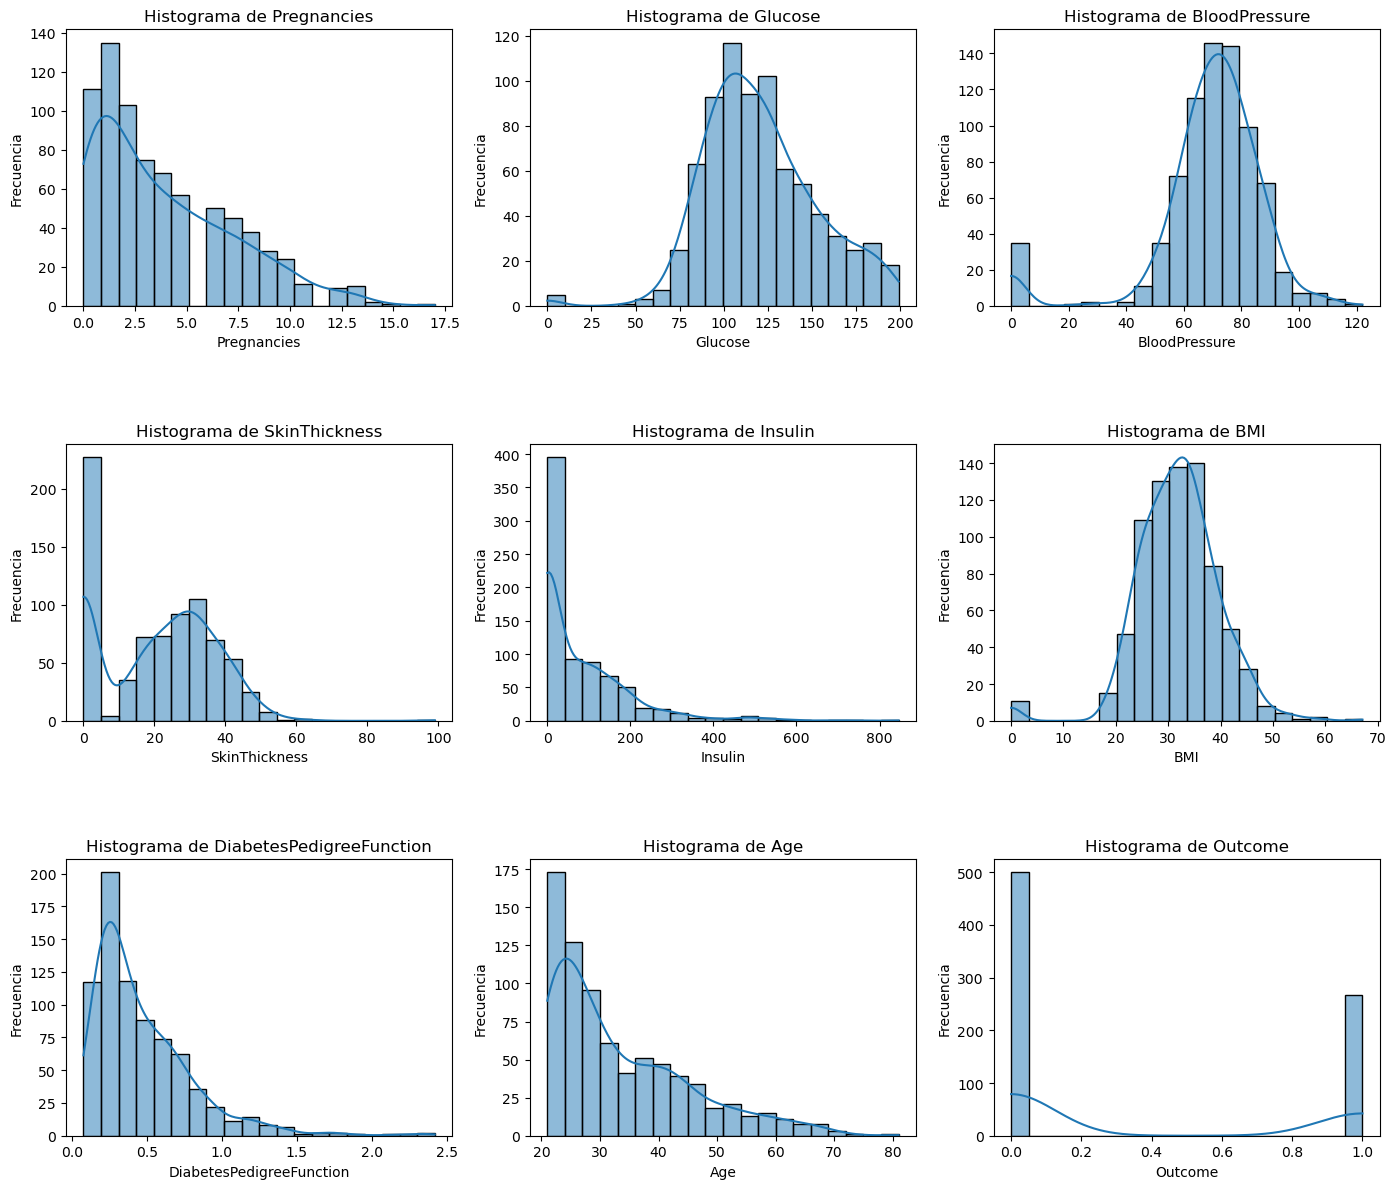

In [9]:
# Configura el número de columnas y filas de subtramas
num_cols = 3  # q columnas
num_rows = (len(df_diabetes.columns) + 1) // 3  # Calcula el número de filas necesario

# Configurar el tamaño de la figura
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, num_rows * 4))  # Ajusta el tamaño según tus necesidades

# Iterar a través de las columnas y crear histogramas
for i, column in enumerate(df_diabetes.columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    sns.histplot(data=df_diabetes, x=column, kde=True, bins=20, ax=ax)
    ax.set_title(f'Histograma de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')

# Ajustar el espaciado entre las subtramas para que se vean bien
plt.tight_layout()

fig.subplots_adjust(hspace=0.5)  


plt.show()

## OUTLIERS Y DATOS ERRÓNEOS

<span style="color:blue">
* Se aprecia que hay 35 filas con "BloodPressure" en 0, lo cual podría indicar un error en medición o de registro.   <br>    * Lo mismo sucede con "Glucose" y "BMI", detectamos 5 y  11 filas con valor 0 respectivamente.   <br>
    </span>

In [10]:
# Controlamos cantidad de filas con BloodPressure en cero y también en glucosa
blood=df_diabetes[df_diabetes["BloodPressure"]==0]
glucose=df_diabetes[df_diabetes["Glucose"]==0]
bmi=df_diabetes[df_diabetes["BMI"]==0]
print(blood.shape)
print(glucose.shape)
print(bmi.shape)

(35, 9)
(5, 9)
(11, 9)


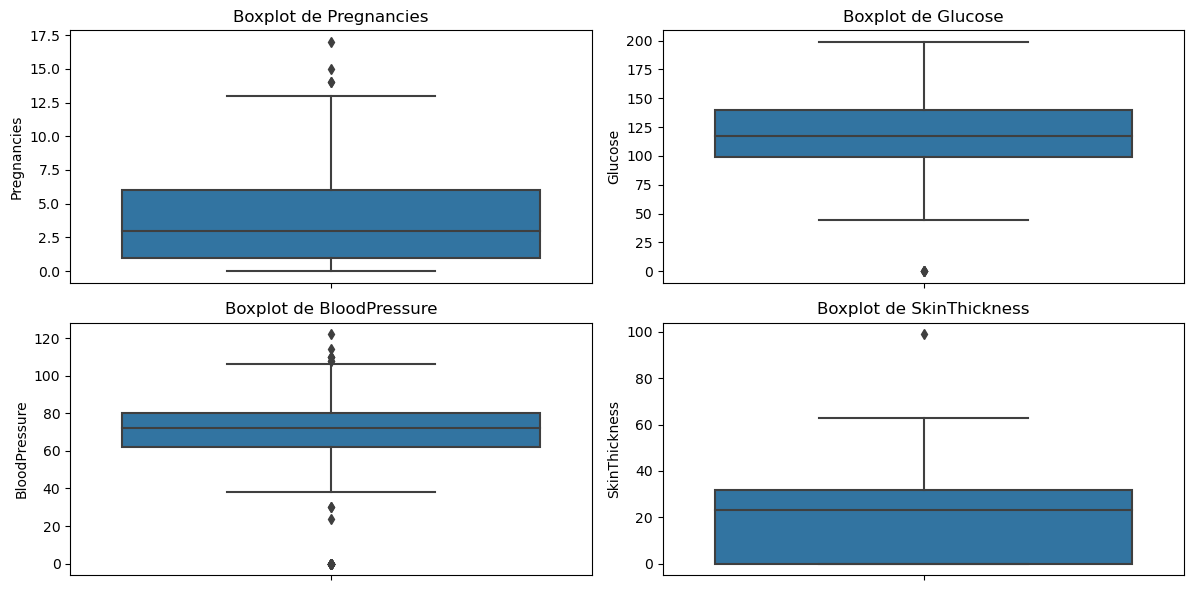

In [17]:

fields_1 = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness"]

plt.figure(figsize=(12, 6))

for i, field in enumerate(fields_1, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_diabetes, y=field, showfliers=True)
    plt.title(f'Boxplot de {field}')
    plt.xlabel("")
    plt.ylabel(field)

plt.tight_layout()
plt.show()

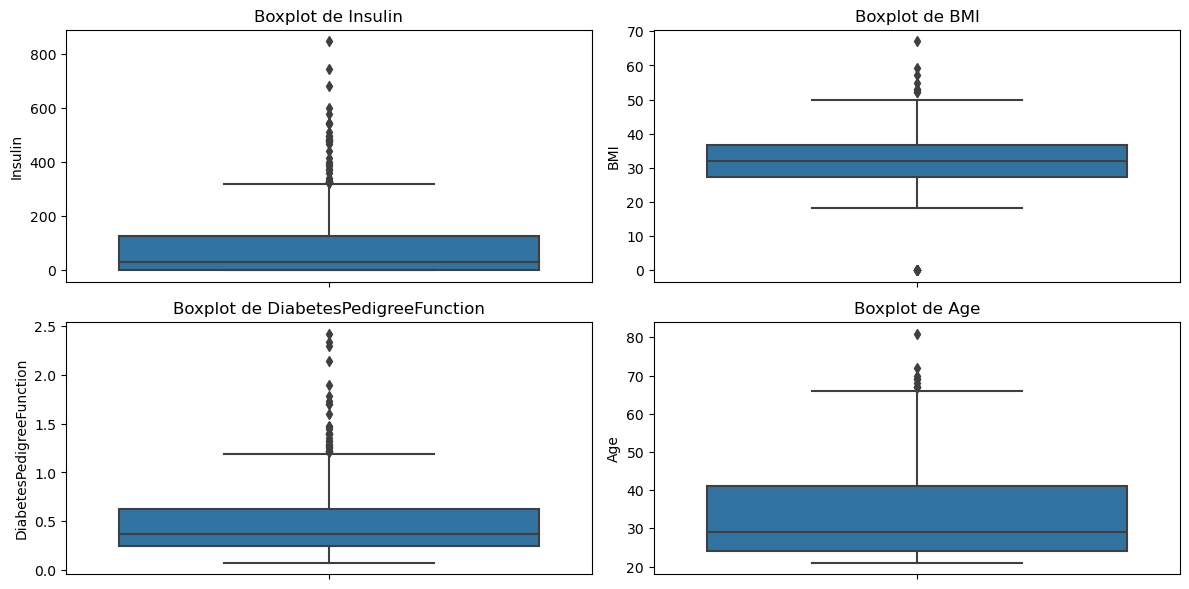

In [18]:
# Supongamos que los siguientes 4 campos que deseas graficar son "blood_pressure", "skin_thickness", "diabetes_pedigree_function" y "num_pregnancies"

fields_2 = ["Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

plt.figure(figsize=(12, 6))

for i, field in enumerate(fields_2, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_diabetes, y=field, showfliers=True)
    plt.title(f'Boxplot de {field}')
    plt.xlabel("")
    plt.ylabel(field)

plt.tight_layout()
plt.show()

## GRÁFICOS - CORRELACIONES

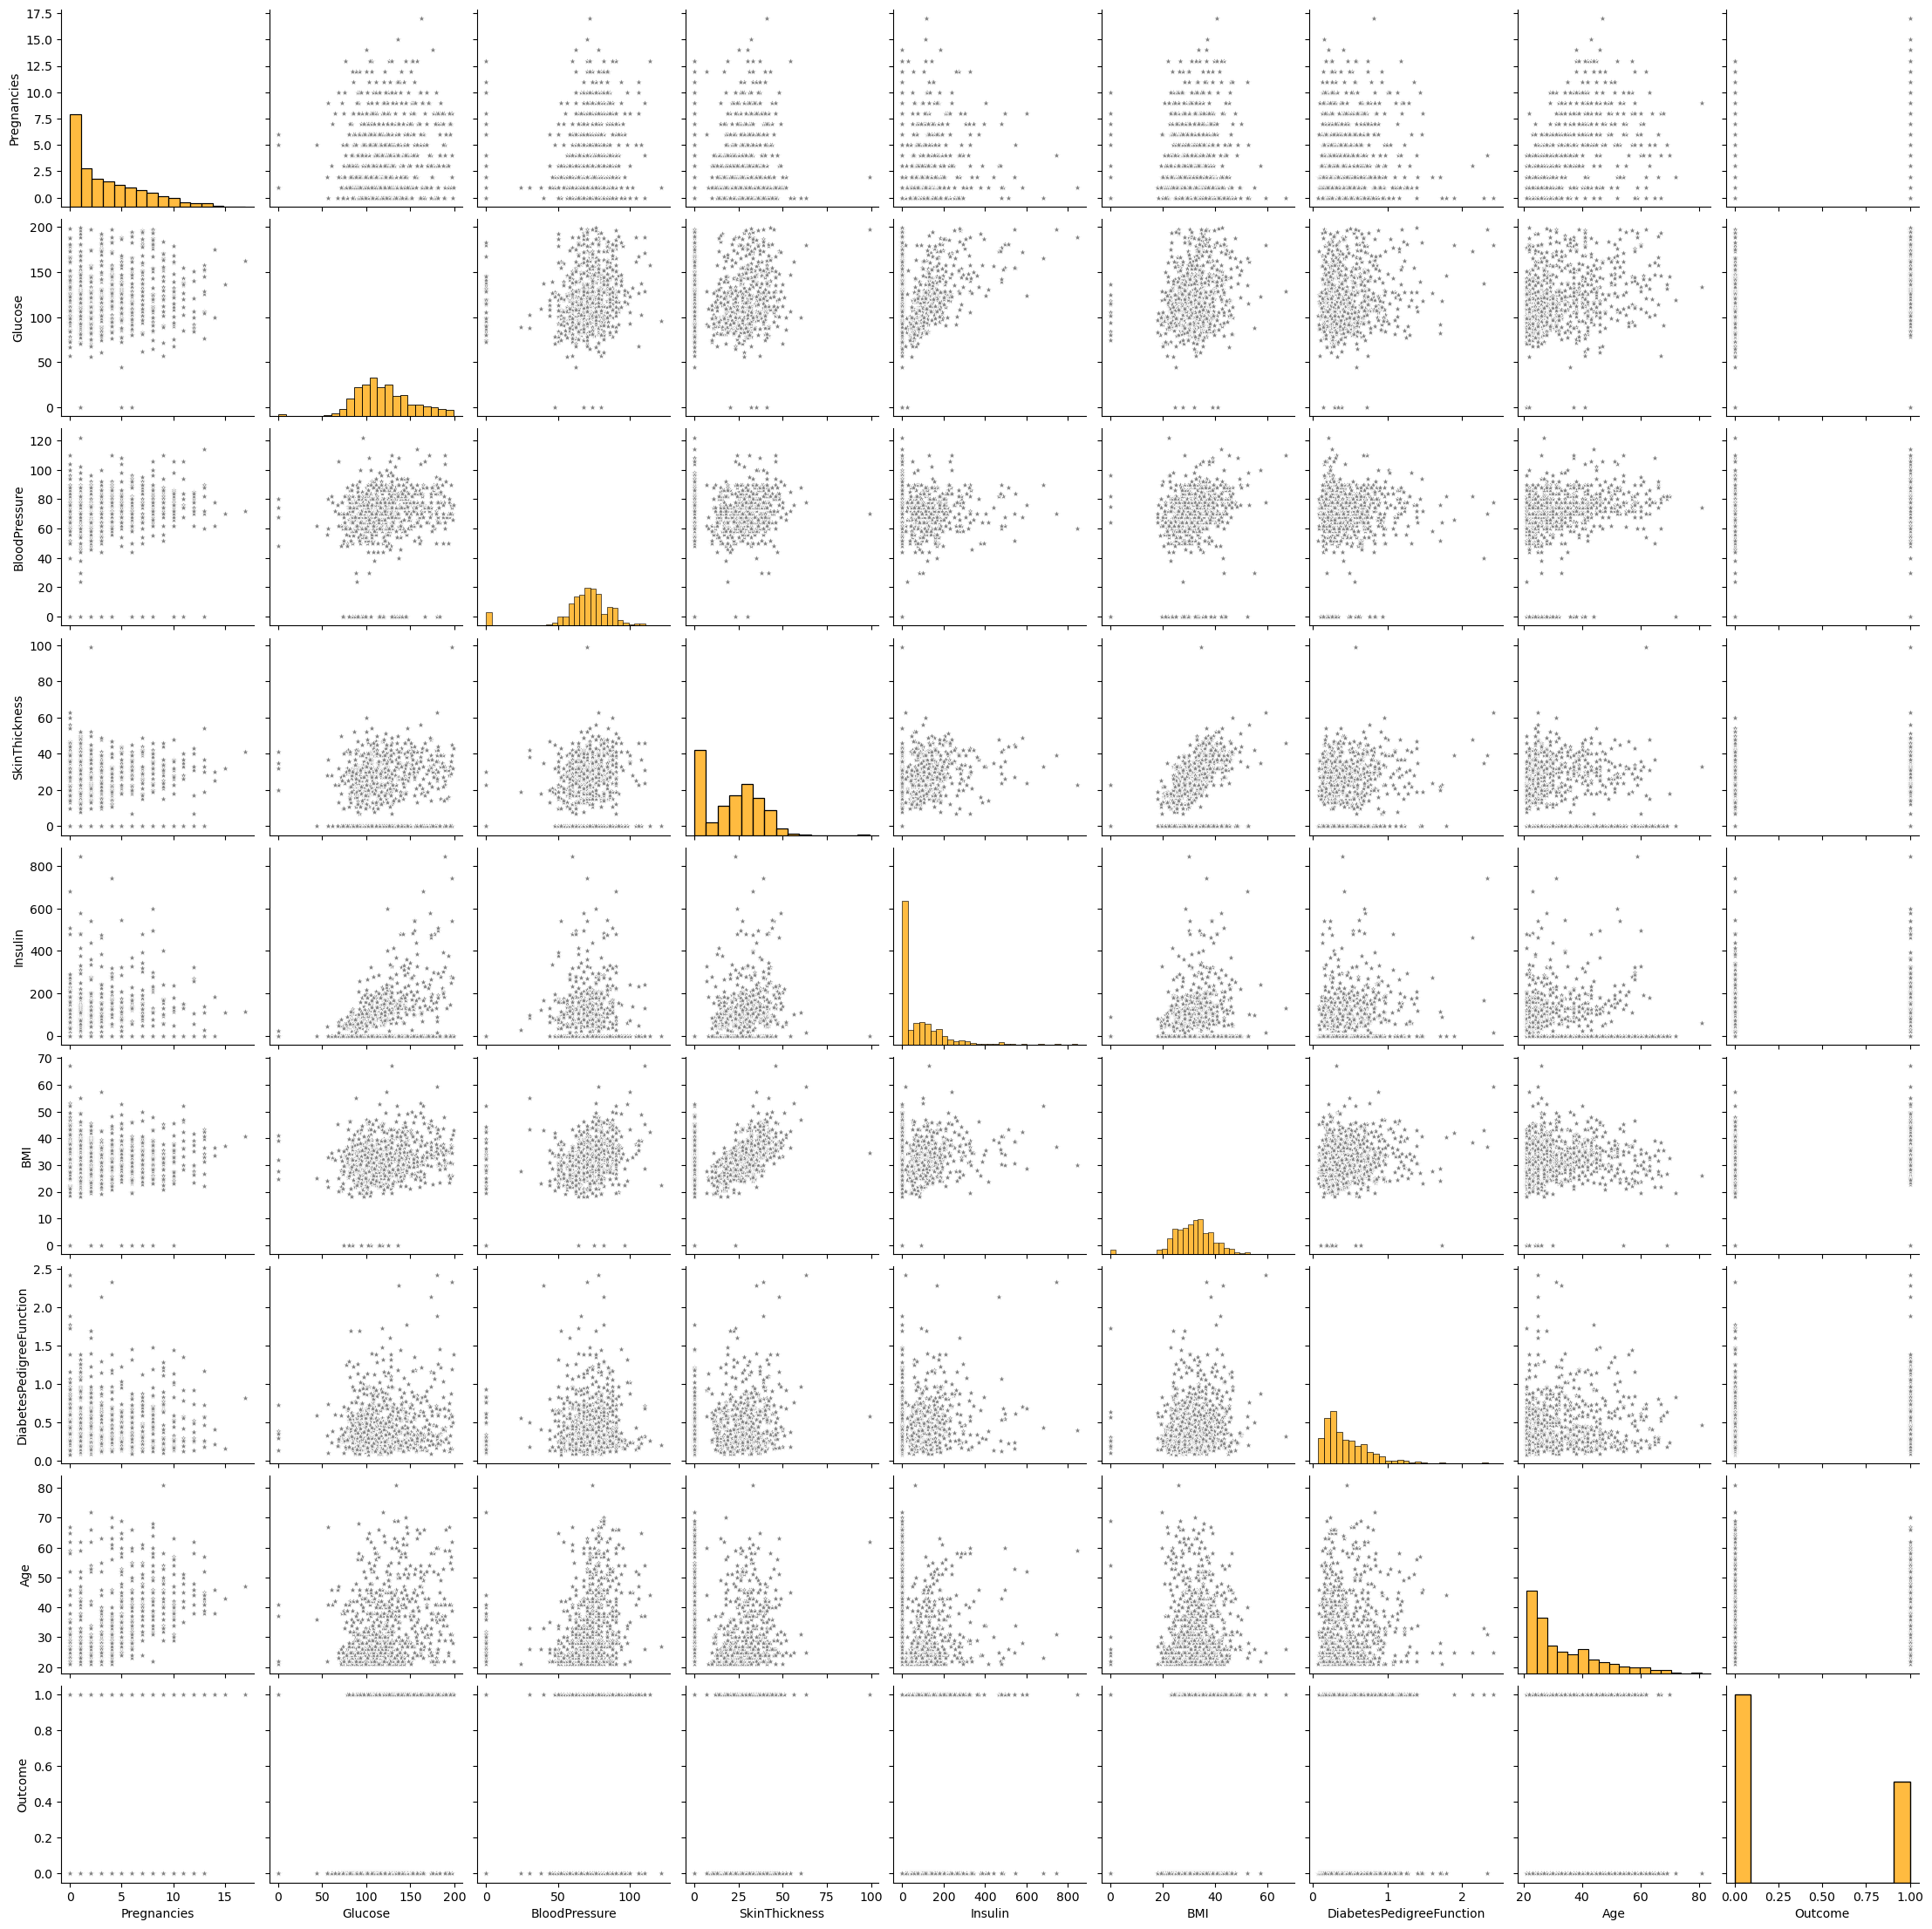

In [12]:
# Si quiero graficar algunos campos: sns.pairplot(df, vars = ["petal_length", "petal_width"])
# La diagonal por defecto de pairplot representa histogramas. Sin embargo, estableciendo el argumento diag_kind como
# "kde" puedes agregar estimaciones de densidad tipo núcleo en lugar de histogramas y estableciendo el argumento

sns.pairplot(df_diabetes,plot_kws = {'color': 'grey', 'marker': '*'},
             diag_kws = {'color': 'orange'})
plt.show()

### CORRELACIÓN DE PEARSON
* La matriz de correlación de Pearson muestra la relación lineal entre todas las combinaciones de pares de columnas numéricas en el DataFrame. Cada valor en la matriz representa el coeficiente de correlación de Pearson entre dos variables, que varía entre -1 y 1.
* DataFrame.corr(method='pearson', min_periods=1, numeric_only=False)
* pearson : standard correlation coefficient

<div style="color:blue">
Se observa en la matriz que existe una relación moderada de 0.54 entre "Pregnancies" y "Age". 
</div>

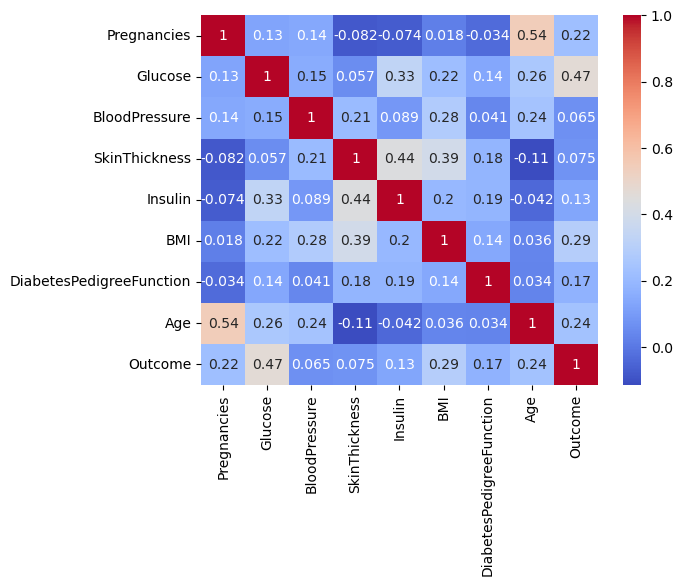

In [13]:
# Calculate correlation matrix
correlation_matrix = df_diabetes.corr(method='pearson')
# Heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()